# 機械学習とクラス分類問題

**機械学習 (machine learning)** とは、与えられた問題に対して、コンピュータ自身が学習し、学習結果を活かした問題解決を行うしくみのことです。人工知能 (artificial inteligence) を実現する手段として活用されています。

今回は、クラス分類問題をとりあげ、いよいよ本格的な機械学習の世界に足を踏み入れていきます。


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import japanize_matplotlib #matplotlibの日本語化  
except ModuleNotFoundError:
    !pip install japanize_matplotlib
    import japanize_matplotlib 
sns.set(font="IPAexGothic") #日本語フォント設定

## 学習と機械学習

ニュートンは、リンゴが落ちるのを見て、万有引力の法則を発見しました。
もう少し正確に書くと、いろんな現象の観察結果と微積分を使って、「$F ∼ Mm/r^2$ としか思えない」という理由を示しています。

<img src="http://ktymtskz.my.coocan.jp/S/physic/P/p88.jpg" width="50%" />

発見された万有引力の法則は、数理モデルとして記述されて、
これから発生する事象（未来）を予想できるようになります。

__数理モデル__
$$
F ∼ Mm/r^2
$$

ニュートンが万有引力の法則を発見に至ったプロセスは興味深いものです。このプロセスをアルゴリズム化して、コンピュータが法則を発見し、モデル化する手法が機械学習です。

__種類__:

* 教師なし学習 (K-means法, PCAなど)
* 教師あり学習 (線形回帰, ロジスティック回帰、決定木、サポートベクターマシン)
* 強化学習 (Q-Learning)

実は、前回までに学んだK-means法は教師なし学習、線形回帰は教師あり学習と分類され、機械学習アルゴリズムの一種でした。人工知能の基礎となる機械学習といっても、身構えなくてはならないほど難しいものではありません。

### 教師あり学習

教師あり学習は、問題と答えをコンピュータに与えることで予測モデルを学習させる方法です。
事前に、「特徴を表すデータ」と答えである「目的データ」が必要です。 

説明のため、これまでに作成してきた身長体重データセットを思い出してください。

* **説明変数**: 特徴を表すデータとして、「身長」と「体重」が与えられる 
* **目的変数**: 目的データとして、「職業」が与えられる

__学習__

機械学習とは、説明変数と目的変数の大量のデータセットを与え、そこから目的変数を予測するモデルを作成することです。

![ml_fit-fs8.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/e14ceec0-fb4c-93b6-5273-658eba03f818.png)


__予測__  

予測モデルに未知のデータを与えると、目的データが出力されます。


![model_predict_X-fs8.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/a5454677-a908-8ef2-d8e5-551b322dd097.png)

目的データの種類によって、回帰問題と分類問題に分けられる。 

<div class="alert alert-info">

回帰と分類

* **回帰問題**: 数値を予測すること
* **クラス分類問題**: 職業などのカテゴリを予測すること

</div>


### クラス分類

クラス分類は、カテゴリデータを予測することです。カテゴリの数が２つなら２クラス分類、それ以上なら多クラス分類と呼ばれます。

クラス分類が重要なのは、画像認識など興味深いアプリケーションが作れる点にあります。
例えば、画像を多次元データとして説明変数、そのラベルを目的変数として学習させると、
画像認識が可能になります。後半では、簡単な画像認識を少しだけ学びます。

![ml-image-fs8.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/49804ec0-fca7-ab8b-b832-426db4f96d64.png)


### 回帰からクラス分類へ

ロジスティック回帰は、線形回帰のバリエーションです。
ロジスティック「回帰」と、回帰がついていますが、クラス分類アルゴリズムです。
回帰からクラス分類の原理を理解していきましょう。

原理: 線形回帰の予測モデルに、シグモイド関数([ロジスティック関数](http://kenichia.hatenablog.com/entry/2017/03/04/122551))を組み合わせることで、カテゴリー値に変換します。

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

<div class="alert alert-info">

Let's try

シグモイド関数をmatplotlibで描画してみよう

</div>


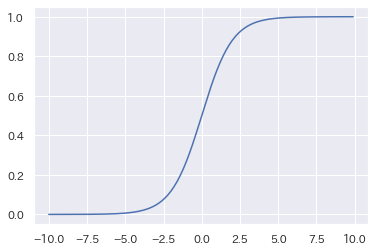

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import e

x = np.arange(-10, 10, 0.1)
y = 1 / (1 + e**-x)

plt.plot(x, y)



__線形回帰(前回)__

$$
y = a_1 x_1+a_2 x_2 + a_n x_n + b
$$

__ロジスティック回帰__

目的変数は、確率であるため$𝑝$とおきます。
すると、$𝑥_𝑖$ がどんな値をとっても目的変数$𝑝$が$0$から$1$までの範囲に収まります。

$$
p = \frac{1}{1 + e^{a_1 x_1+a_2 x_2 + a_n x_n + b}}
$$

少し式を変形してみましょう。

$$
\frac{p}{1-p} = e^{a_1 x_1+a_2 x_2 + a_n x_n + b}
$$

$$
log{\frac{p}{1-p}} = a_1 x_1+a_2 x_2 + a_n x_n + b = l
$$

これで、線形回帰と同じように、
最小二乗法を用いて偏回帰係数$a_i$が求められることがわかると思います。

なお、$l$のことをロジットと呼び、ロジットの対数をとると、オッズ比が出てきます。
(オッズ比は、ある事象が発生する確率と発生しない確率の比になっています。)

$$
e^{l} = \frac{p}{1-p}
$$




<div class="alert alert-info">

２クラス分類問題と多クラス分類問題

数学的に扱いやすいため、２クラス分類問題と多クラス分類問題は区別されています。
上記の説明は、２クラス分類のケースですが、
ロジスティック回帰は多クラス分類に拡張されています。
興味があるときは、多クラスロジスティック回帰の原理も調べてみましょう。

</div>


## ２クラス分類問題

乳がんデータセットを用いて、２クラス分類問題として、乳がんの良性・悪性を判定しましょう。

In [3]:
import pandas as pd
data = pd.read_csv('cancer_ja.csv')
data.head()

,良性,平均半径,平均感触,平均周囲長,平均面積,平均平滑性,平均密集度,平均凹部,平均凹点,平均対称性,...,最悪半径,最悪感触,最悪周囲長,最悪半径.1,最悪平滑さ,最悪密集度,最悪凹部,最悪凹点,最悪対称性,最悪フラクタル次元
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


乳がんのデータセットは、クラスタリングと主成分分析を思い出してください。

### 学習モデル

まず、とりあえずロジスティック回帰モデルを学習してみましょう。


In [4]:
from sklearn.linear_model import LogisticRegression

重回帰のときと同じく、２つの説明変数にしてみます。

ここでは、適当にふたつの`平均半径`と`平均感触`を選んでいます。
他の説明変数に変えてみてください。


In [6]:
X = data[['平均半径', '平均感触']]
y = data['良性']
model = LogisticRegression()

# 学習の実行
model.fit(X, y)

LogisticRegression()

学習したモデルが予測するのは、`predict`を使います。

In [7]:
model.predict([(20, 18)])

array([0])

入力に対して、予測された良性/悪性が出力されました。
モデルの学習はできたようです。

<div class="alert alert-info">

Let's try

入力を変更してどのように予測されるか調べてみよう。
また、予測間違いを起こすデータも調べてみよう。

</div>

In [8]:
y_pred = model.predict(X)
pd.DataFrame({'正解': y, '予測': y_pred})

,正解,予測
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
564,0,0
565,0,0
566,0,0
567,0,0


### 正解率

ロジスティック回帰を始め、機械学習によって予測されるモデルは基本的に確率的なモデルです。 
100%正解ということはまずありません。 
予測されたモデルがどの程度、正解率なのか調べる必要があります。

<div class="alert alert-info">

Accuracy: 正解率

正解率を定量的に図る指標

$$
\frac{TF+TN}{TP+FP+FN+TN}
$$

* TF(True Positive): 例. 良性かつ良性と予想される
* FN(False Negative, 偽陰性): 悪性であるが、良性と予想される
* FP(False Positive, 偽陽性): 良性であるが、悪性と予想される
* TN(True Negative): 悪性かつ悪性と判定される

こちらの解説に詳しい: https://qiita.com/FukuharaYohei/items/be89a99c53586fa4e2e4

</div>

sklearn では、正解率を計算するための関数(メソッド）も当然、用意されています。



In [9]:
model.score(X, y)

0.8910369068541301

### オッズ比の分析

説明変数の各々が目的変数に及ぼす影響度を表わす偏係数は`.coef_`で習得できるので、
学習済みモデルの各変数のオッズ比を取得します。

```
odds_ratio = np.exp(model.coef_)
```


In [10]:
print('係数', model.coef_)
print('オッズ比:', np.exp(model.coef_))
pd.DataFrame(np.exp(model.coef_).T,
             index = [X.columns.values],
             columns = ['オッズ比'])

係数 [[-1.0462619  -0.21688595]]
オッズ比: [[0.3512483  0.80502177]]


,オッズ比
平均半径,0.351248
平均感触,0.805022


## ホールドアウト法

人工知能では、過去に学習したデータではなく、
未来の**未知のデータ**に対する予測精度が重要になります。

**ホールドアウト法**は、全データを訓練データとテストデータに分割することで、モデルの精度を評価する方法です。一部のデータを未知のデータとすることで、未知のデータに対する精度が測定できるようになります。

* 訓練データ: モデルを学習するためのデータ
* テストデータ: モデルを評価するためのデータ

sklearn には、ランダムにデータを訓練データとテストデータに分割する関数`train_test_split()`が用意されています。通常は、この関数を使います。

__訓練データとテストデータに分割__

* `test_size`: 訓練用(60%),テスト用(30%)
* `random_state=0`: 乱数の生成を固定し、毎回同じ乱数で分割させる

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('訓練データ数:', len(X_train))
print('テストデータ数:', len(X_test))


訓練データ数: 398
テストデータ数: 171


学習は、**訓練データ**に対してのみ行います。（テストデータに対しても学習してしまうのは、機械学習的にはチートです。）

In [12]:
# 学習の実行
model.fit(X_train, y_train)

LogisticRegression()

テストデータを使って、モデルを評価していきます。

__テストデータからまとめて予測する__

* `y_test`: （未知データの）正解
* `y_pred:`: モデルから予測値


In [13]:
y_pred = model.predict(X_test)
pd.DataFrame({'正解': y_test, '予測': y_pred})

,正解,予測
512,0,1
457,1,1
439,1,1
298,1,1
37,1,1
...,...,...
7,0,1
408,0,0
523,1,1
361,1,1


正解率は、訓練データとテストデータに対して、それぞれ算出します。

In [14]:
print('正解率(train)', model.score(X_train, y_train))
print('正解率(test)', model.score(X_test, y_test))

正解率(train) 0.8894472361809045
正解率(test) 0.9064327485380117


正解率(test)は、訓練データに含まれていない未知データに対する正解率なので、
**汎化性能**を表しています。

正解率(train)を調べるのも重要です。
機械学習によくあることですが、
訓練データへの適合しすぎてしまう**過学習(overfitting)**が発生していないか、
確認することができます。
正解率(train)が正解率(test)より高すぎる場合は、過学習の危険性があります。

<div class="alert alert-info">

過学習

訓練データに特化して学習しすぎてしまうこと。
訓練データの正解率がテストデータより明らかに高い場合は、過学習を疑いましょう。

</div>

## 多クラスロジスティック回帰

次は、ロジスティック回帰モデルによる多クラス分類をしてみましょう。

今回は、身長体重データセットから職業を予測するモデルを作ってみます。
せっかくなので、学習済モデルを一旦ファイルに保存し、ロードしたモデルも正しく動作するか、
検証してみます。


In [15]:
data = pd.read_csv('bmi.csv')
print('データのサイズ', data.shape)
data.head()

データのサイズ (1535, 4)


,名前,身長,体重,職業
0,福井 優也,178.0,85.0,B
1,九里 亜蓮,187.0,92.0,B
2,加藤 拓也,176.0,88.0,B
3,大瀬良 大地,187.0,93.0,B
4,今村 猛,183.0,98.0,B


### 学習

`身長`と`体重`を説明変数、`職業`を目的変数にしてロジスティック回帰モデルを作成します。
多クラス分類であっても、sklearnが適切に処理してくれるので、特に特別な設定は必要ありません。

ホールドアウト法で訓練データとテストデータに分割するのを忘れないようにしましょう。


In [16]:
X = data[['身長', '体重']]
y = data['職業']

# ホールドアウト法による訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('訓練データ数:', len(X_train))
print('テストデータ数:', len(X_test))

# 学習の実行
model = LogisticRegression()
model.fit(X, y)

訓練データ数: 1074
テストデータ数: 461


LogisticRegression()

学習したモデルが予測するのは、`predict`を使います。

In [17]:
y_pred = model.predict(X_test)
pd.DataFrame({'正解': y_test, '予測':y_pred}).head()

,正解,予測
1421,F,B
1018,F,F
651,B,B
303,B,B
1127,F,F


正解率も評価しておきましょう。

In [18]:
print('正解率(train)', model.score(X_train, y_train))
print('正解率(test)', model.score(X_test, y_test))

正解率(train) 0.8305400372439479
正解率(test) 0.8524945770065075


## クラス分類アルゴリズム

クラス分類アルゴリズムは、ロジスティック回帰以外あります。
sklearn から簡単に試せるものもあります。

__決定木__: `sklearn.tree.DecisionTreeClassifier`

決定木は、条件分岐によってグループを分割して分類する手法です。その際にグループがなるべく同じような属性で構成されるように分割します。

__ランダムフォレスト__: `sklearn.ensemble.RandomForestClassifier`

ランダムフォレストとは、分類や回帰に使える機械学習の手法です。決定木をたくさん作って多数決する（または平均を取る）ような手法です。ランダムフォレストは大量のデータを必要としますが、精度の高い予測/分類を行えるという特徴があります。

__サポートベクターマシン（SVC)__: `sklearn.svm.LinearSVC`

サポートベクターマシンは、パターン認識モデルの一つで、線形入力素子を利用して2クラスのパターン識別器を構成する手法です。2つのグループ間の最も距離の離れた箇所（最大マージン）を見つけ出し、その真ん中に識別の線を引きます。

__ナイーブベイズ分類器__: `sklearn.naive_bayes.GaussianNB`

ナイーブベイズ分類器は特徴間に強い（ナイーブな）独立性を仮定した上でベイズの定理を使う、確率に基づいたアルゴリズムです。

__多層パーセプトロン(MLP)__: `sklearn.neural_network.MLPClassifier`

人間の脳（ニューロン）の数理モデルに基づくアルゴリズムです。深層学習に用いられています。詳しい原理は、授業の後半で扱います。


## コースワーク

<div class="admonition tip">

**例題（２クラス分類問題）**

乳がんのデータをホールドアウト法で訓練データとテストデータ(7:3)に分割し、
良性か悪性か判定する予測モデルを作成してみよう。

1. ロジスティック回帰
2. 決定木
3. ランダムフォレスト
4. サポートベクターマシン
5. ナイーブベイズ
6. 多層パーセプトロン(MLP)

説明変数は、各アルゴリズムに適したものを選んで構いません。
テストデータに対する正解率で比較してみましょう。

</div>

